# The Sparks Foundation - Computer Vision & Internet of Things
##### Topic: Color Identification in Images
##### Task 1 : Implement an image color detector which identifies all the colors in an image or video.
##### Author : Nidhi Pandya 

## Importing Required Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

## Reading and plotting the image

In [2]:
img = cv2.imread('image.jpg')
cv2.imshow("image", img)

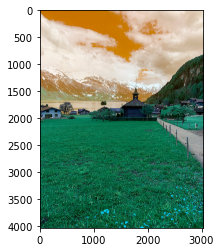

In [3]:
## By default the image is in BGR format
plt.imshow(img)

In [4]:
print("The type of this input is {}".format(type(img)))
print("Shape: {}".format(img.shape)) ## (height px, width px, 3 for BGR)

The type of this input is <class 'numpy.ndarray'>
Shape: (4032, 3024, 3)


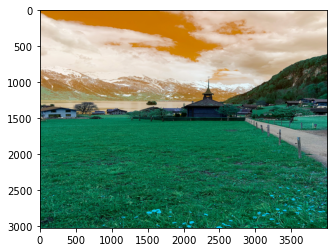

In [5]:
img = cv2.resize(img, (4000, 3024))
plt.imshow(img)

## Declaring global variables

In [6]:
clicked = False
r = g = b = x_pos = y_pos = 0

## Reading the csv file

In [7]:
df = pd.read_csv('colors.csv')
df
## The file doesn't have comlumn names

,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
0,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
1,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
2,alabama_crimson,Alabama Crimson,#a32638,163,38,56
3,alice_blue,Alice Blue,#f0f8ff,240,248,255
4,alizarin_crimson,Alizarin Crimson,#e32636,227,38,54
...,...,...,...,...,...,...
859,yellow_orange,Yellow Orange,#ffae42,255,174,66
860,yellow_process,Yellow (Process),#ffef00,255,239,0
861,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
862,zaffre,Zaffre,#0014a8,0,20,168


In [8]:
## Adding column names
index = ["color", "color_name", "hex", "R", "G", "B"]
df = pd.read_csv('colors.csv', names=index, header=None)
df

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255
...,...,...,...,...,...,...
860,yellow_orange,Yellow Orange,#ffae42,255,174,66
861,yellow_process,Yellow (Process),#ffef00,255,239,0
862,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
863,zaffre,Zaffre,#0014a8,0,20,168


## Function to print the color name

In [9]:
def get_color_name(R, G, B):
    minimum = 10000
    for i in range(len(df)):
        d = abs(R - int(df.loc[i, "R"])) + abs(G - int(df.loc[i, "G"])) + abs(B - int(df.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            color = df.loc[i, "color_name"]
    return color

## Function to calculate the x,y cordinates of Image tracing mouse movement

In [10]:
def draw_function(event, x, y, flags, param):
    ## If there's mouse movement
    if event == cv2.EVENT_MOUSEMOVE:
        global b, g, r, x_pos, y_pos, clicked
        clicked = True
        x_pos = x
        y_pos = y
        b, g, r = img[y, x]
        b = int(b)
        g = int(g)
        r = int(r)

In [11]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_function)

In [ ]:
while True:

    cv2.imshow("image", img)
    if clicked == True:

        # cv2.rectangle(image, startpoint, endpoint, color, thickness). -1 fills entire rectangle
        cv2.rectangle(img, (20, 20), (3000, 200), (b, g, r), -1)

        # Creating text string to display (Color name and RGB values)
        text = get_color_name(r, g, b) + " ==> (R,G,B) = " + str(r) + ',' + str(g) +','+ str(b)

        # cv2.putText(image, text, start, font(0-7), fontScale, color, thickness, lineType)
        cv2.putText(img, text, (50, 120), 5, 4, (255, 255, 255), 3, cv2.LINE_AA)

        # For very light colours we will display text in black colour
        if r + g + b >= 400:
            cv2.putText(img, text, (50, 120), 5, 4, (0, 0, 0), 3, cv2.LINE_AA)

        clicked = False

    # Break the loop when user hits 'esc' key
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

# Task 2 completed!